## SVM Fashion Mnist

Este es un ejemplo de cómo usar SVM para clasificar imágenes de Fashion Mnist. El dataset Fashion Mnist es un dataset de ropa que contiene 10 clases diferentes. En este ejemplo se usa SVM para clasificar las imágenes.

In [1]:
# Instalación de librerías
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importación de librerías
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
warnings.filterwarnings('ignore')

In [3]:
# Leer dataset
df = pd.read_csv('./assets/fashion-mnist_train.csv', delimiter=',')
df.head()
# !El label se encuentra en la primera columna

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Labels
fashion_mnist_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [5]:
# Visualización datos
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB
None
              label        pixel1        pixel2        pixel3        pixel4  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       4.500000      0.000900      0.006150      0.035333      0.101933   
std        2.872305      0.094689      0.271011      1.222324      2.452871   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      0.000000      0.000000      0.000000      0.000000   
50%        4.500000      0.000000      0.000000      0.000000      0.000000   
75%        7.000000      0.000000      0.000000      0.000000      0.000000   
max        9.000000     16.000000     36.000000    226.000000    164.000000   

             pixel5        pixel6        pixel7        pixel8        pixel9  \
count  60000.000000  60000.000000  60000.00000

In [6]:
# Tratamiento de datos
# Valores nulos
print('Por columna:', df.isnull().sum())
print('Total:', df.isnull().sum().sum())
# Validar duplicados
print('Duplicados:', df.duplicated().sum()) # 43 duplicados
# Eliminar duplicados
df = df.drop_duplicates()
# Visualizar forma
print('Dimensiones:', df.shape)
print('Labels únicos:', df.label.unique()) # 0-9

Por columna: label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64
Total: 0
Duplicados: 43
Dimensiones: (59957, 785)
Labels únicos: [2 9 6 0 3 4 5 8 7 1]


In [7]:
# Preparación X, y
X = df.drop('label', axis=1)
y = df['label']

In [8]:
# Reducir ejemplos
x_reduced = X[0: 500]
y_reduced = y[0: 500]
print('Dimensiones reducidas:', x_reduced.shape, y_reduced.shape)

Dimensiones reducidas: (500, 784) (500,)


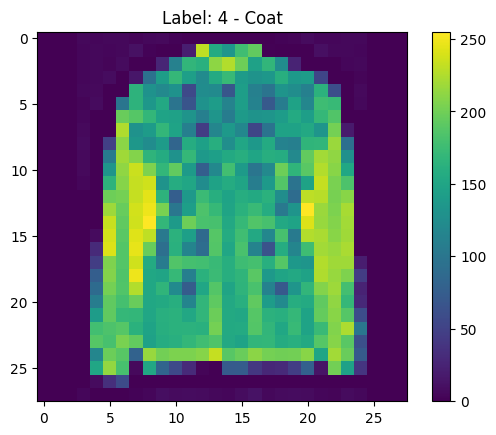

In [9]:
# Visualizar una prenda - Graficar
image_index = 5
label_index  = y_reduced[image_index]

plt.imshow(x_reduced.iloc[image_index].values.reshape(28, 28))
plt.title(f"Label: {label_index} - {fashion_mnist_labels[label_index]}")
plt.colorbar()
plt.show()

In [10]:
# Definición del modelo SVM
# SVC puede utilizar distintos kernels: linear, poly, rbf, sigmoid, precomputed
# kernel='linear' -> Linear Kernel
# kernel='poly' -> Polynomial Kernel
# kernel='rbf' -> Radial Basis Function Kernel
# kernel='sigmoid' -> Sigmoid Kernel
# kernel='precomputed' -> Precomputed

#classifier = SVC(kernel='poly', degree=8, random_state=0) # Degree: grado del polinomio (default=3)
#classifier = SVC(kernel='rbf', random_state=0)
#classifier = SVC(kernel='sigmoid', random_state=0)
#classifier = SVC(kernel='precomputed', random_state=0)
classifier = SVC(kernel='linear', random_state=0)

In [11]:
# Entrenamiento del modelo
classifier.fit(x_reduced, y_reduced)

SVC(kernel='linear', random_state=0)

In [12]:
# Predicción del x_reduced
y_pred = classifier.predict(x_reduced)
y_pred

array([2, 9, 6, 0, 3, 4, 4, 5, 4, 8, 0, 8, 9, 0, 2, 2, 9, 3, 3, 3, 8, 7,
       4, 4, 0, 4, 4, 8, 7, 1, 5, 0, 5, 3, 2, 7, 3, 4, 2, 1, 6, 0, 9, 6,
       0, 5, 6, 7, 7, 2, 5, 2, 2, 4, 1, 4, 9, 8, 3, 4, 5, 5, 6, 3, 5, 8,
       5, 9, 8, 1, 2, 8, 1, 3, 6, 8, 3, 4, 2, 5, 0, 2, 6, 8, 1, 2, 7, 6,
       6, 4, 6, 5, 0, 1, 7, 3, 5, 8, 4, 3, 8, 5, 0, 5, 3, 0, 8, 5, 6, 1,
       0, 7, 6, 1, 9, 7, 6, 9, 3, 3, 2, 6, 0, 6, 3, 6, 3, 5, 9, 7, 7, 6,
       3, 6, 7, 2, 4, 1, 3, 1, 0, 6, 3, 0, 3, 4, 6, 5, 9, 3, 7, 2, 4, 8,
       8, 6, 7, 5, 6, 1, 9, 9, 1, 7, 0, 8, 9, 7, 7, 8, 6, 9, 2, 3, 0, 4,
       1, 9, 4, 7, 2, 8, 0, 0, 8, 4, 5, 4, 3, 2, 6, 1, 7, 7, 5, 7, 7, 8,
       0, 4, 3, 9, 7, 4, 5, 3, 6, 7, 6, 9, 6, 9, 4, 1, 2, 7, 3, 8, 3, 1,
       3, 0, 0, 6, 4, 2, 8, 9, 2, 8, 8, 2, 6, 2, 8, 7, 0, 1, 4, 9, 5, 1,
       9, 6, 7, 7, 7, 6, 3, 8, 6, 4, 5, 9, 3, 4, 9, 6, 1, 3, 0, 9, 1, 6,
       9, 9, 4, 6, 4, 6, 1, 4, 9, 3, 7, 2, 4, 7, 0, 1, 1, 8, 2, 4, 1, 6,
       3, 1, 5, 5, 8, 4, 7, 2, 3, 8, 4, 5, 5, 6, 3,

In [13]:
# metricas
print('Accuracy:', accuracy_score(y_reduced, y_pred))
print('Classification Report:\n', classification_report(y_reduced, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_reduced, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        65
           4       1.00      1.00      1.00        51
           5       1.00      1.00      1.00        41
           6       1.00      1.00      1.00        61
           7       1.00      1.00      1.00        52
           8       1.00      1.00      1.00        45
           9       1.00      1.00      1.00        50

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

Confusion Matrix:
 [[52  0  0  0  0  0  0  0  0  0]
 [ 0 38  0  0  0  0  0  0  0  0]
 [ 0  0 45  0  0  0  0  0  0  0]
 [ 0  0  0 65  0  0  0  0  0  0]
 [ 0  0  0  0 51  0  0  0  0  0]
 [ 0  0  0  0  0 41